In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def visualize_feature_correlations(csv_path):
    # Load your combined CSV
    df = pd.read_csv(csv_path)

    # Encode label to binary (Swiss=1, Solid=0)
    df["label_bin"] = (df["label"].str.lower() == "swiss").astype(int)

    # Keep only numeric features
    numeric_df = df.select_dtypes(include=[float, int]).copy()

    # Compute correlations with the label
    corr = numeric_df.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr,
        cmap="coolwarm",
        annot=False,
        center=0,
        cbar_kws={"label": "Correlation"},
    )
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

    # Optional: print top 10 features most correlated with the label
    target_corr = corr["label_bin"].drop("label_bin").sort_values(ascending=False)
    print("\nTop 10 features positively correlated with Swiss Cheese:")
    print(target_corr.head(10))
    print("\nTop 10 features negatively correlated with Swiss Cheese:")
    print(target_corr.tail(10))

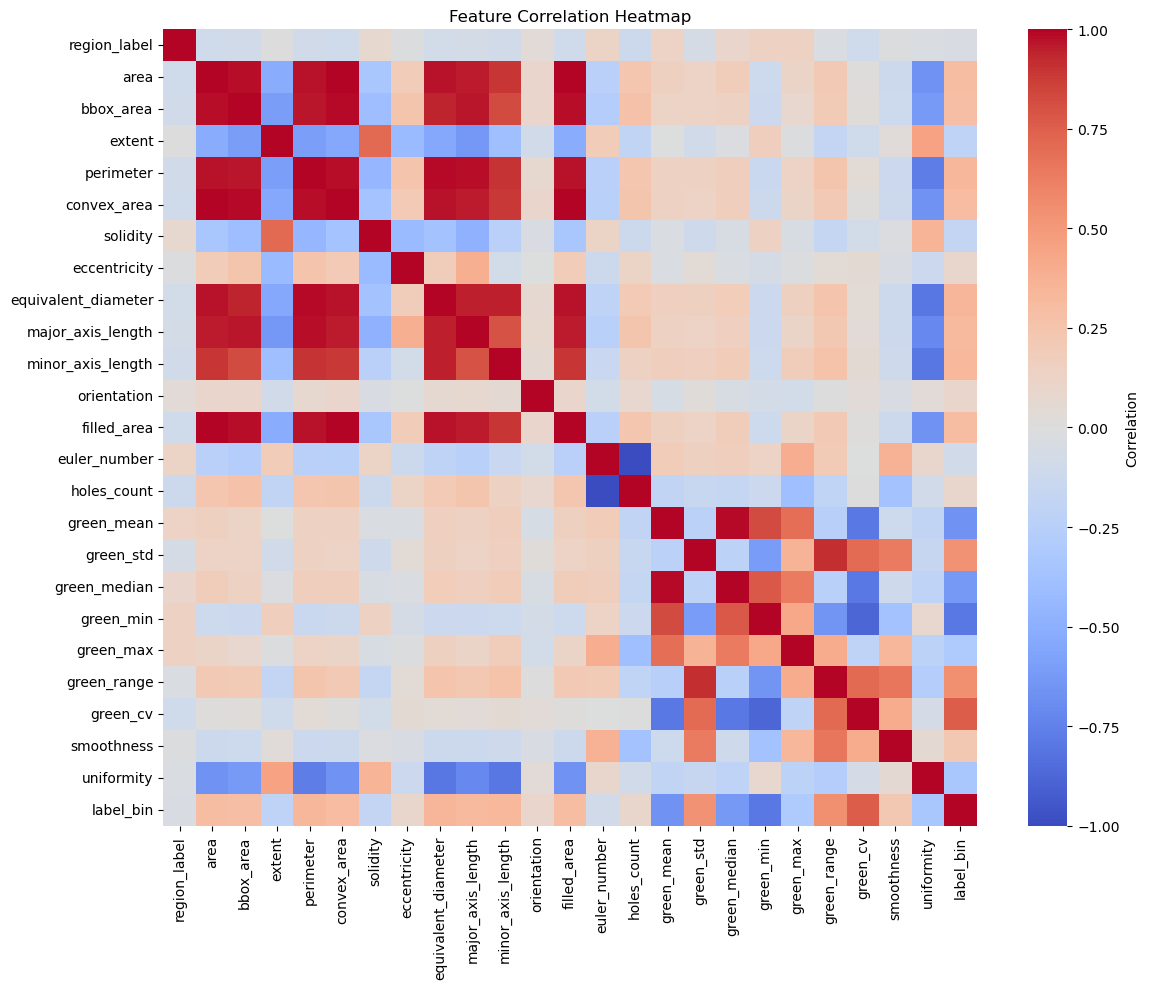


Top 10 features positively correlated with Swiss Cheese:
green_cv               0.764445
green_range            0.554276
green_std              0.537233
equivalent_diameter    0.345770
perimeter              0.337916
minor_axis_length      0.334712
major_axis_length      0.314351
convex_area            0.304963
filled_area            0.304399
area                   0.304392
Name: label_bin, dtype: float64

Top 10 features negatively correlated with Swiss Cheese:
eccentricity    0.088870
region_label   -0.034827
euler_number   -0.092705
solidity       -0.176718
extent         -0.210055
green_max      -0.297411
uniformity     -0.343536
green_median   -0.628886
green_mean     -0.666284
green_min      -0.794580
Name: label_bin, dtype: float64


In [3]:
visualize_feature_correlations("features/features_all.csv")


In [4]:
def visualize_solid_features(csv_path, features=None):
    """
    Visualize feature relationships and summary stats for solid inclusions only.
    Arguments:
        csv_path : str   -> path to combined 'features_all.csv'
        features : list  -> specific features to visualize (optional)
    """

    # Load CSV and filter for solids only
    df = pd.read_csv(csv_path)
    solid_df = df[df["label"].str.lower() == "solid"].copy()

    # Auto-select numeric columns if not provided
    if features is None:
        features = solid_df.select_dtypes(include=["float", "int"]).columns.tolist()

    print(f"Showing {len(features)} numeric features for SOLID inclusions.")
    print(f"Number of solid inclusions: {len(solid_df)}")

    # ---- 1️⃣ Summary statistics table ----
    display(solid_df[features].describe().T.style.background_gradient(cmap="YlGnBu"))

    # ---- 2️⃣ Feature correlation heatmap ----
    corr = solid_df[features].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr,
        cmap="coolwarm",
        annot=False,
        center=0,
        cbar_kws={"label": "Correlation"},
    )
    plt.title("Solid Inclusion Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

    # ---- 3️⃣ Pairplot for relationships between top features ----
    # Select top few with highest variance (optional)
    top_features = solid_df[features].var().sort_values(ascending=False).head(5).index.tolist()

    sns.pairplot(
        solid_df[top_features],
        diag_kind="kde",
        corner=True,
        plot_kws={"alpha": 0.6, "s": 25},
    )
    plt.suptitle("Solid Inclusions — Top Feature Relationships", y=1.02)
    plt.show()

    # ---- 4️⃣ Individual feature distributions ----
    plt.figure(figsize=(14, 4 * len(top_features)))
    for i, feat in enumerate(top_features, 1):
        plt.subplot(len(top_features), 1, i)
        sns.histplot(solid_df[feat], kde=True, color="steelblue")
        plt.title(f"Distribution of {feat} (Solid Inclusions)")
        plt.xlabel(feat)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Showing 24 numeric features for SOLID inclusions.
Number of solid inclusions: 81


,count,mean,std,min,25%,50%,75%,max
region_label,81.000000,5.395062,2.948216,1.000000,3.000000,5.000000,7.000000,13.000000
area,81.000000,209.271605,174.970213,39.000000,86.000000,142.000000,295.000000,769.000000
bbox_area,81.000000,267.308642,237.885510,42.000000,108.000000,169.000000,360.000000,1034.000000
extent,81.000000,0.820268,0.080394,0.460059,0.781893,0.828431,0.875000,0.972222
perimeter,81.000000,49.575652,22.967929,20.485281,32.727922,43.313708,63.213203,131.840620
convex_area,81.000000,218.172840,184.987418,40.000000,87.000000,147.000000,304.000000,876.000000
solidity,81.000000,0.965732,0.024995,0.840541,0.956522,0.969231,0.981132,1.000000
eccentricity,81.000000,0.639032,0.163518,0.178701,0.512124,0.641621,0.745446,0.943888
equivalent_diameter,81.000000,15.107654,6.220074,7.046726,10.464158,13.446190,19.380549,31.290913
major_axis_length,81.000000,18.193804,8.361927,7.707885,11.976223,16.035957,23.115891,52.656893


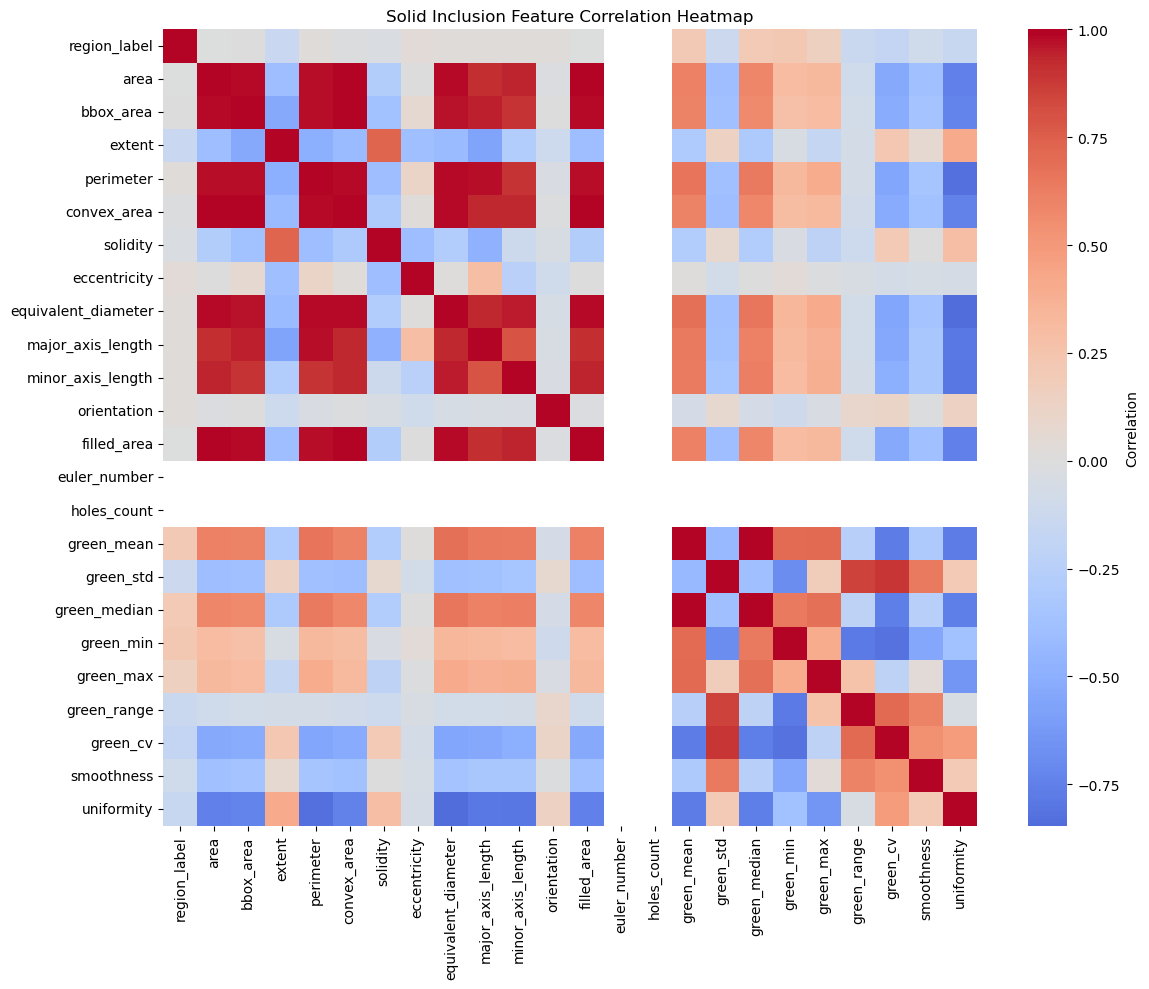

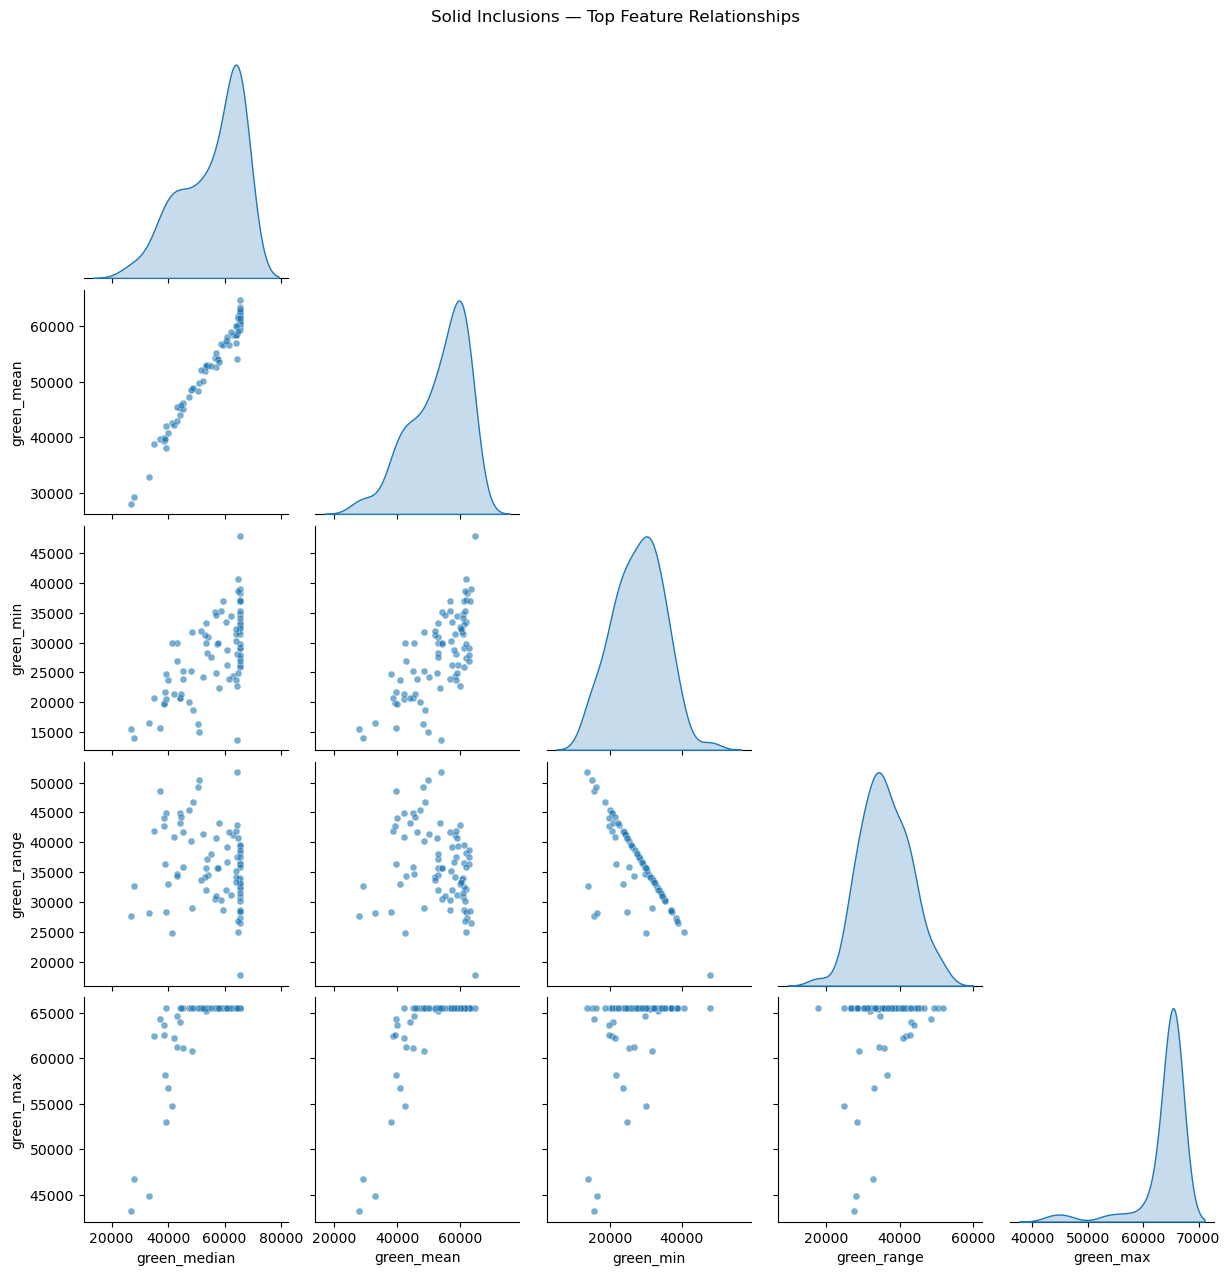

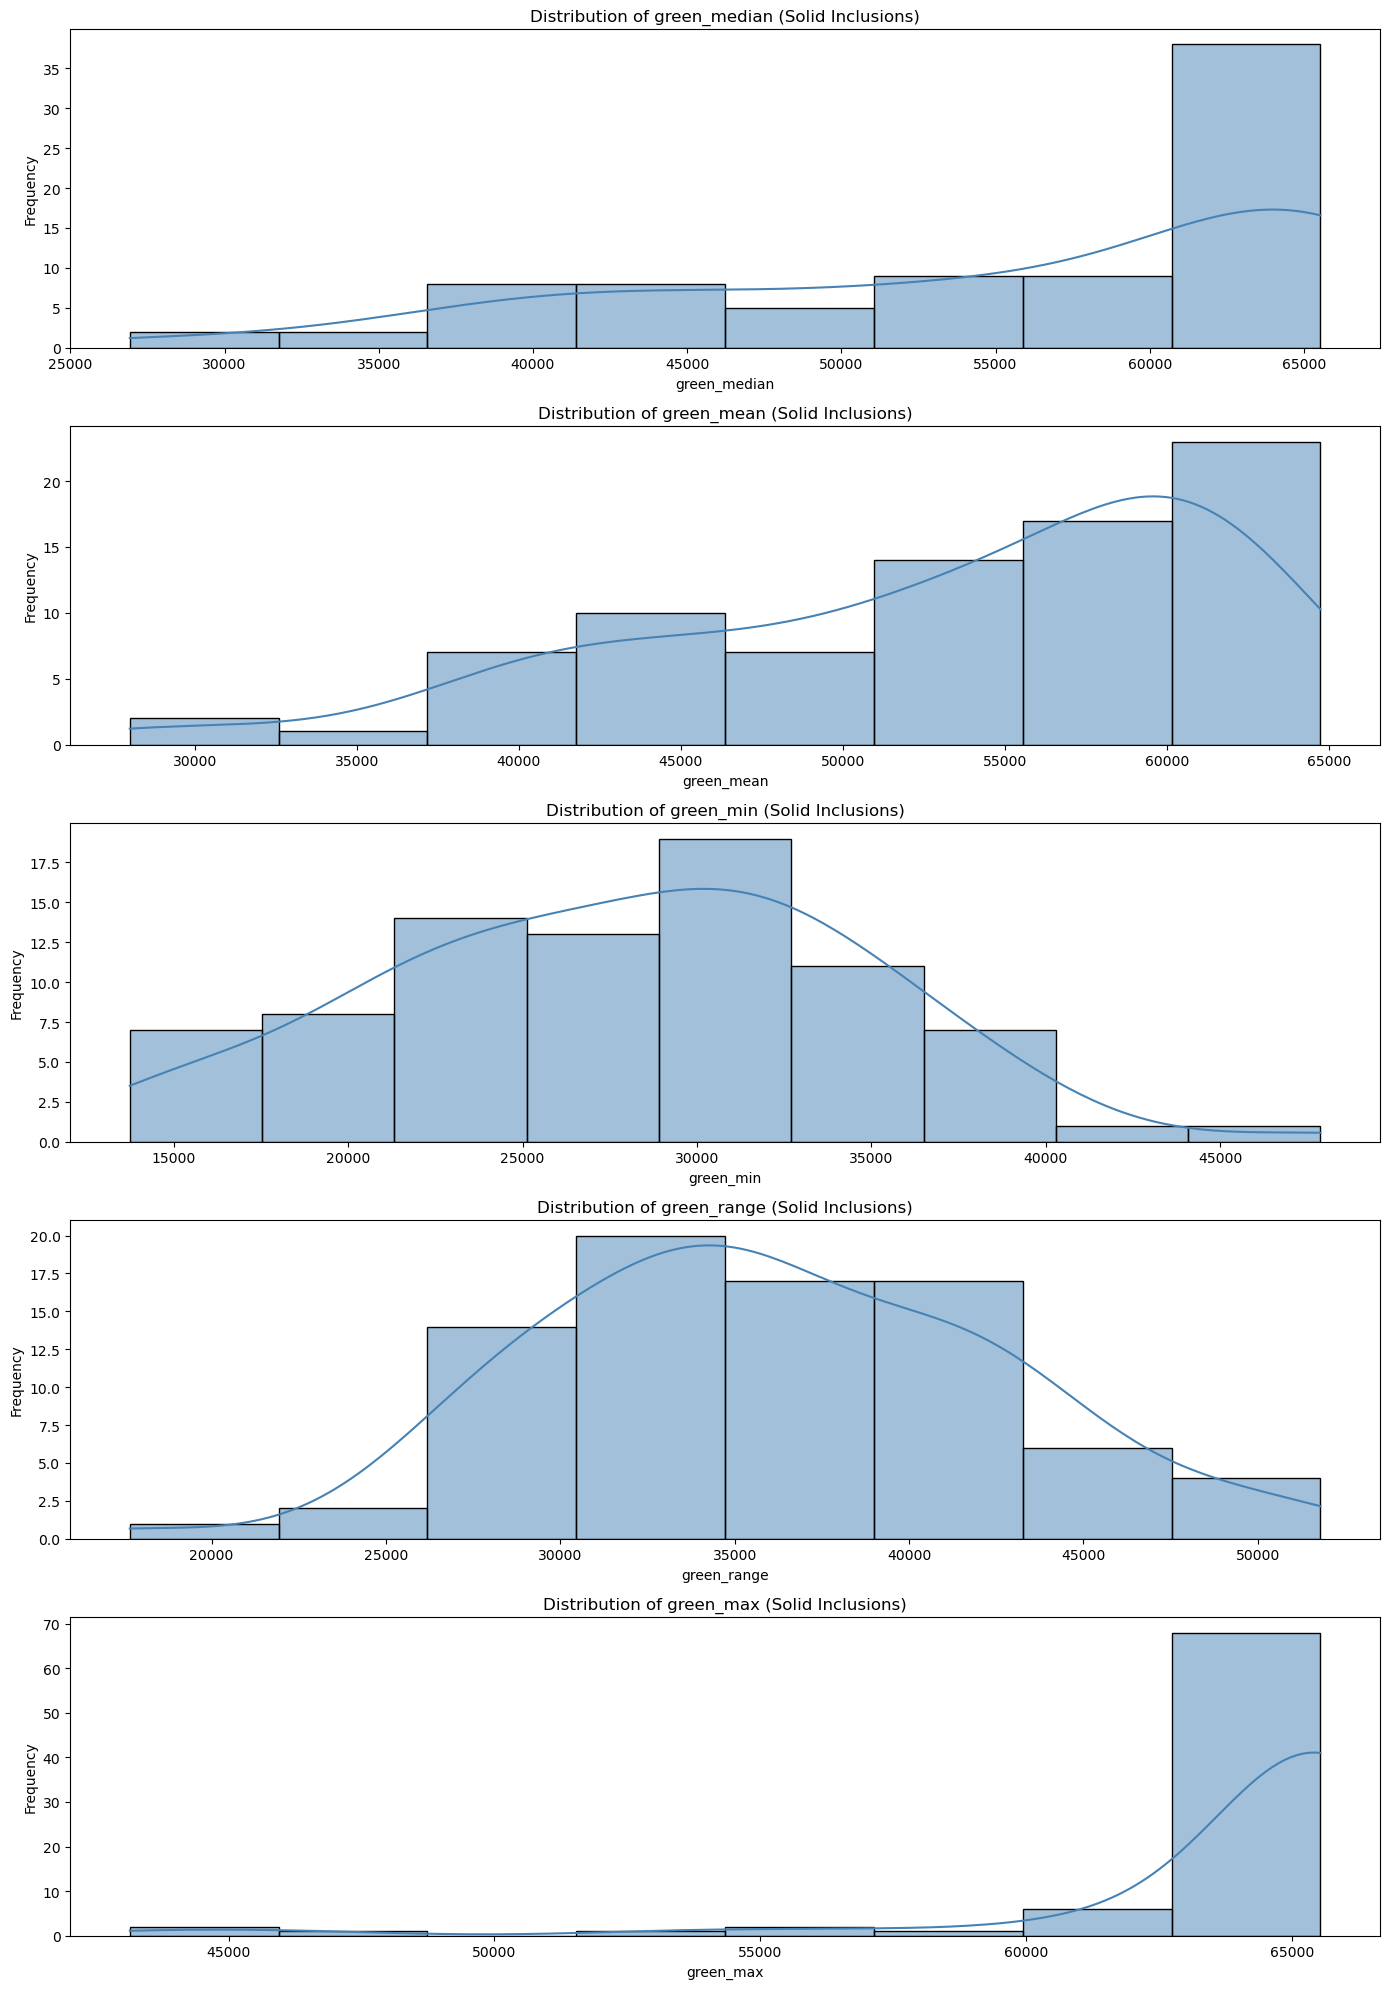

In [ ]:
visualize_solid_features("features/features_all.csv")